<a href="https://colab.research.google.com/github/gentryae/ML_classwork/blob/main/A8_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Deep Learning
> Week 8 In-class Exploration

In this notebook, we explore concepts of regression and deep learning further.

In [134]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Linear Regression and Cost Functions Example

Let's take this step-by-step to begin with.

In [135]:
# Create basic linear data from class slides
data = np.genfromtxt("food_truck_data.txt", delimiter=",")
data

array([[ 6.1101 , 17.592  ],
       [ 5.5277 ,  9.1302 ],
       [ 8.5186 , 13.662  ],
       [ 7.0032 , 11.854  ],
       [ 5.8598 ,  6.8233 ],
       [ 8.3829 , 11.886  ],
       [ 7.4764 ,  4.3483 ],
       [ 8.5781 , 12.     ],
       [ 6.4862 ,  6.5987 ],
       [ 5.0546 ,  3.8166 ],
       [ 5.7107 ,  3.2522 ],
       [14.164  , 15.505  ],
       [ 5.734  ,  3.1551 ],
       [ 8.4084 ,  7.2258 ],
       [ 5.6407 ,  0.71618],
       [ 5.3794 ,  3.5129 ],
       [ 6.3654 ,  5.3048 ],
       [ 5.1301 ,  0.56077],
       [ 6.4296 ,  3.6518 ],
       [ 7.0708 ,  5.3893 ],
       [ 6.1891 ,  3.1386 ],
       [20.27   , 21.767  ],
       [ 5.4901 ,  4.263  ],
       [ 6.3261 ,  5.1875 ],
       [ 5.5649 ,  3.0825 ],
       [18.945  , 22.638  ],
       [12.828  , 13.501  ],
       [10.957  ,  7.0467 ],
       [13.176  , 14.692  ],
       [22.203  , 24.147  ],
       [ 5.2524 , -1.22   ],
       [ 6.5894 ,  5.9966 ],
       [ 9.2482 , 12.134  ],
       [ 5.8918 ,  1.8495 ],
       [ 8.211

## Calculate model output given parameters
Calculate the output for a single training example. The formula for this for a single variable model is as follows:

$$h_\theta(x) = \theta_0 + \theta_1x_1$$

or more specifically to our syntax here:

$$\hat{y}_\theta(x) = \theta_0 + \theta_1x_1$$


In [136]:
# make up some initial thetas
theta_0 = 0.2
theta_1 = 0.8

In [137]:
# get example 0
x1, y = data[0]
x1, y

(6.1101, 17.592)

In [138]:
# use formula for linear regression to get output
y_hat = theta_0 + theta_1 * x1
y_hat

5.088080000000001

## Error, cost, and loss
Recall our overall cost (or loss) function: 

$$J(\theta) = \frac{1}{2m}\sum\limits_{i = 1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$$

What is the error for this one training example given these model parameters?

In [139]:
# calculate basic error
error = y_hat - y
error

-12.503919999999997

What is the cost associated with this training example given these model parameters?

In [140]:
# calculate cost
cost = 0.5 * (error ** 2)
cost

78.17400768319996

## Updating the model parameters based on gradient descent
What would gradient descent look like for this example? Recall:


$$\theta_j := \theta_j - \alpha(h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

or more specifically to our syntax here:

$$\theta_j := \theta_j - \alpha (\hat{y}_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

Keeping in mind:  
* _j_ denotes an individual parameter in a model. 
* _i_ denotes a particular training example

In [141]:
# new parameter - learning rate
alpha = 5e-1
alpha

0.5

In [142]:
# calculate update for theta 0
theta_0_new = theta_0 - alpha * (error) * 1
theta_0_new

6.451959999999999

In [143]:
# calculate update for theta 1
theta_1_new = theta_1 - alpha * (error) * x1
theta_1_new

39.00010079599999

In [144]:
# do the update
theta_0 = theta_0_new
theta_1 = theta_1_new

## Let's write some functions to help us out with training.

In [145]:
def calculate_single_forward(thetas, train_ex):
    '''
        thetas: theta0, theta1, ..., thetaj
        train_ex: (x, y)
        
        returns: gradients based on a single training example
    '''

    # parse model parameters
    theta_0 = thetas[0]
    theta_1 = thetas[1]

    # parse data inputs
    x0 = 1 # @@ maybe this needs to change??
    x1 = train_ex[0]
    y = train_ex[1]

    # do one forward pass with a single training example
    # to calculate error and gradient
    y_hat = theta_0 + theta_1 * x1
    error = y_hat - y

    # for each theta, we need the gradient for an update
    gradients = np.array([error * x0, error * x1])
    cost = 0.5 * (error ** 2)
    # Question: what would you do differently for GD or mini-batch GD?

    return gradients, cost

For the actual gradient descent, this is the update function:

$$\theta_j := \theta_j - \alpha \sum\limits_{i = 1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$$


In [146]:
def gradient_descent(training_data, thetas, alpha=5e-3):
    '''
    training_data: training dataset
    thetas: theta0, theta1, ..., thetaj
    alpha: learning rate, default to 0.0005
    
    returns: 
            - thetas: the updated thetas
            - total_error: total error (note, not loss) from this iteration
    '''
    
    total_error = 0
    total_cost = 0
    overall_gradients = np.zeros(2) 

    # compute the summation of gradients across all training examples
    for ex in training_data:
        gradients, cost = calculate_single_forward(thetas, ex)

        # gradients[0] is the error term (gradients[0] = error * x0 = error * 1)
        total_cost += cost
        total_error += gradients[0]
        overall_gradients = overall_gradients + gradients

    # update thetas
    theta_0, theta_1 = thetas
    thetas[0] = theta_0 - alpha * overall_gradients[0]
    thetas[1] = theta_1 - alpha * overall_gradients[1]

    return thetas, total_error, total_cost

## Regression

In [149]:
# set initial parameters
thetas = [0.2, 0.8]
old_thetas = thetas.copy()
alpha = 1e-4

# prepare training
total_epochs = 3700
error_traj = [0] * total_epochs
cost_traj = [0] * total_epochs

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error, cost_error = gradient_descent(data, thetas, alpha)
    # store a history of errors
    error_traj[epoch] = epoch_error
    cost_traj[epoch] = cost_error
    

In [150]:
thetas

[-3.8894711920707765, 1.192399767766656]

In [151]:
epoch_error

0.11051924118028023

In [152]:
cost_error

434.2665762762684

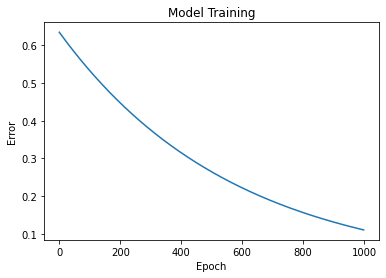

In [153]:
# Let's do an exploratory plot
plt.plot(error_traj[-1000:])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Model Training');

# Homework

### Final Computed Model Parameters

In [156]:
thetas

[-3.8894711920707765, 1.192399767766656]

### Compute and plot the cost function as you perform the gradient descent 


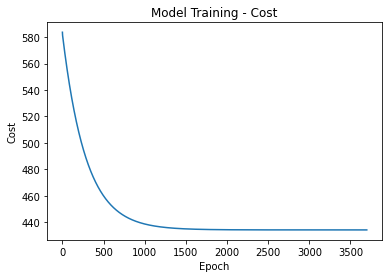

In [158]:
# Let's do an exploratory plot
plt.plot(cost_traj)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Model Training - Cost');

### Plot data with the linear model

Text(0.5, 1.0, 'Comparison of pre- vs post-model training')

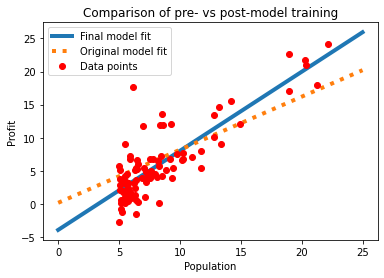

In [159]:
# Let's look at the actual least squares
lin_pts = np.linspace(0, 25, 25) # gives you 25 values between [0, 5]
mdl_pts = thetas[0] + lin_pts * thetas[1]
plt.plot(lin_pts, mdl_pts, linewidth=4, label='Final model fit')
plt.legend()

# Let's look at the original least squares
orig_mdl_pts = old_thetas[0] + lin_pts * old_thetas[1]
plt.plot(lin_pts, orig_mdl_pts, ':', linewidth=4, label='Original model fit')
plt.legend()

# Let's plot the original points
plt.plot(data[:,0], data[:,1], 'ro', label='Data points') # 'ro' for red, circle
plt.legend()
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Comparison of pre- vs post-model training')